## Árboles de Regresión 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv("C:/Users/l_jor/OneDrive/Documents/GitHub/python-ml-course/datasets/boston/Boston.csv")
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
data.shape

(506, 14)

In [4]:
colnames = data.columns.values.tolist()
predictors = colnames[:13]
target = colnames[13]
X = data[predictors]
Y = data[target]

In [5]:
from sklearn.tree import DecisionTreeRegressor

In [6]:
regtree = DecisionTreeRegressor(min_samples_split=30, min_samples_leaf=10, random_state=0)

In [7]:
regtree.fit(X,Y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=10,
                      min_samples_split=30, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=0, splitter='best')

In [8]:
preds = regtree.predict(data[predictors])

In [9]:
data["preds"] =preds

In [10]:
data[["preds","medv"]]

,preds,medv
0,22.840000,24.0
1,22.840000,21.6
2,35.247826,34.7
3,35.247826,33.4
4,35.247826,36.2
5,24.058621,28.7
6,20.811111,22.9
7,20.020833,27.1
8,20.020833,16.5
9,20.020833,18.9


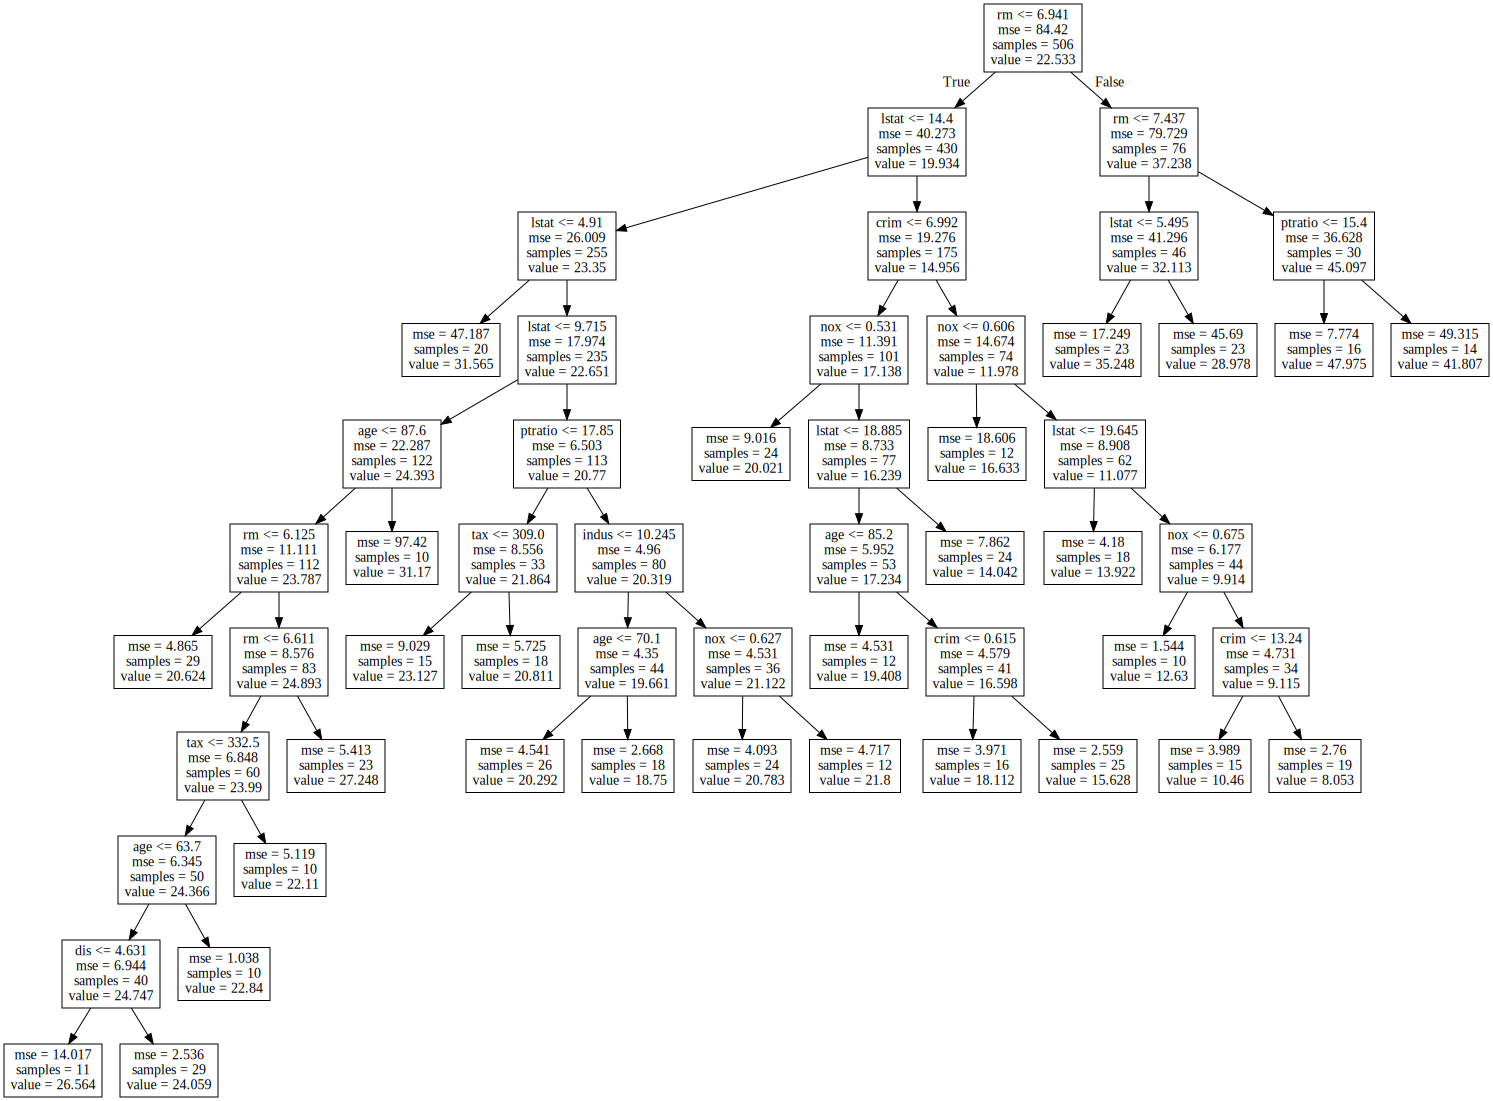

In [11]:
from sklearn.tree import export_graphviz
with open("C:/Users/l_jor/OneDrive/Documents/GitHub/python-ml-course/notebooks/resources/boston_rtree.dot", "w") as dotfile:
    export_graphviz(regtree, out_file=dotfile, feature_names=predictors)
    dotfile.close()

    
    import os
os.environ["PATH"] += os.pathsep + 'C:/Users/l_jor/Anaconda3/Library/bin/graphviz'
from graphviz import Source
file = open("C:/Users/l_jor/OneDrive/Documents/GitHub/python-ml-course/notebooks/resources/boston_rtree.dot", "r")
text = file.read()
Source(text)

In [12]:
#from sklearn.cross_validation import KFold
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score 

In [13]:
cv = KFold(n_splits=10,  shuffle=True, random_state=1)
scores = cross_val_score(regtree, X, Y, scoring="neg_mean_squared_error", cv=cv, n_jobs = 1)
print(scores)
score = np.mean(scores)
print(score)

[-13.64925886 -17.28987161 -16.98569707 -47.56954086  -9.26202865
 -17.23057023 -15.41541493 -31.33011027 -22.79877067  -9.54180723]
-20.107307036443846


In [14]:
list(zip(predictors, regtree.feature_importances_))

[('crim', 0.03421203230639308),
 ('zn', 0.0),
 ('indus', 0.0011605887788380146),
 ('chas', 0.0),
 ('nox', 0.01856163073811432),
 ('rm', 0.6308568014337028),
 ('age', 0.01725115143448847),
 ('dis', 0.0013745115995791378),
 ('rad', 0.0),
 ('tax', 0.0023698305298803803),
 ('ptratio', 0.009333247332530954),
 ('black', 0.0),
 ('lstat', 0.28488020584647283)]

## Random forest

In [15]:
from sklearn.ensemble import RandomForestRegressor

In [32]:
forest = RandomForestRegressor(n_jobs=2, oob_score = True, n_estimators=20)
forest.fit(X,Y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=2,
                      oob_score=True, random_state=None, verbose=0,
                      warm_start=False)

In [33]:
forest.oob_prediction_

array([27.07777778, 22.85454545, 35.59090909, 38.        , 34.71666667,
       23.3       , 21.26666667, 18.61428571, 21.88333333, 22.69      ,
       23.64285714, 21.1875    , 21.33333333, 20.65      , 19.98571429,
       20.31428571, 20.71428571, 18.52      , 19.7       , 19.46666667,
       15.1       , 18.36666667, 15.85      , 15.3625    , 17.05555556,
       16.175     , 17.9375    , 15.45      , 21.51428571, 24.36      ,
       16.53333333, 20.19090909, 16.74166667, 15.18      , 13.92      ,
       20.39      , 19.72222222, 20.03333333, 20.        , 28.06363636,
       32.0625    , 30.26666667, 24.175     , 24.65      , 22.44      ,
       20.53333333, 19.8       , 21.1       , 19.3       , 18.31666667,
       22.28333333, 22.14285714, 25.38333333, 21.3       , 18.9       ,
       30.7       , 22.1       , 30.48571429, 22.9       , 20.06363636,
       18.86666667, 18.3       , 24.13333333, 25.24      , 33.12857143,
       25.075     , 20.35714286, 19.88333333, 18.9       , 20.17

In [34]:
data["rforest_pred"] = forest.oob_prediction_
data[["rforest_pred", "medv"]]

,rforest_pred,medv
0,27.077778,24.0
1,22.854545,21.6
2,35.590909,34.7
3,38.000000,33.4
4,34.716667,36.2
5,23.300000,28.7
6,21.266667,22.9
7,18.614286,27.1
8,21.883333,16.5
9,22.690000,18.9


In [29]:
data["rforest_error2"]=(data["rforest_pred"]-data["medv"])**2
sum(data["rforest_error2"])/len(data)

10.162768632010177

In [30]:
forest.oob_score_

0.879615943334145